CU Boulder MSDS course work<br>
DTSA 5510 Unsupervised Algorithms in Machine Learning<br>

# BBC News Classification

data from [kaggle](https://www.kaggle.com/competitions/learn-ai-bbc)<br>
notebook from [repo](https://github.com/elfchildRichter/BBC_News_Classification)<br>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
train = pd.read_csv('data/BBC News Train.csv')
test = pd.read_csv('data/BBC News Test.csv')
train.shape, test.shape

((1490, 3), (735, 2))

# Data Analysis
Inspect, Visualize and Clean the Data [15 pts]

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [5]:
train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [6]:
train.sample(1).Text.values

array(['gangsters dominate gaming chart video games on consoles and computers proved more popular than ever in 2004.  gamers spent more than £1.34bn in 2004  almost 7% more than they did in 2003 according to figures released by the uk gaming industry s trade body. sales records were smashed by the top title of the year gta: san andreas - in which players got the job of turning central character cj into a crime boss. the game sold more than 1 million copies in the first nine days that it was on sale. this feat made it the fastest selling video game of all time in the uk. although only released in november the sprawling story of guns  gangsters game beat off strong competition and by year end had sold more than 1.75 million copies. there were also records set for the number of games that achieved double-platinum status by selling more than 600 000 copies. five titles  including sony eyetoy play and ea s need for speed: underground 2  managed this feat according to figures compiled by cha

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


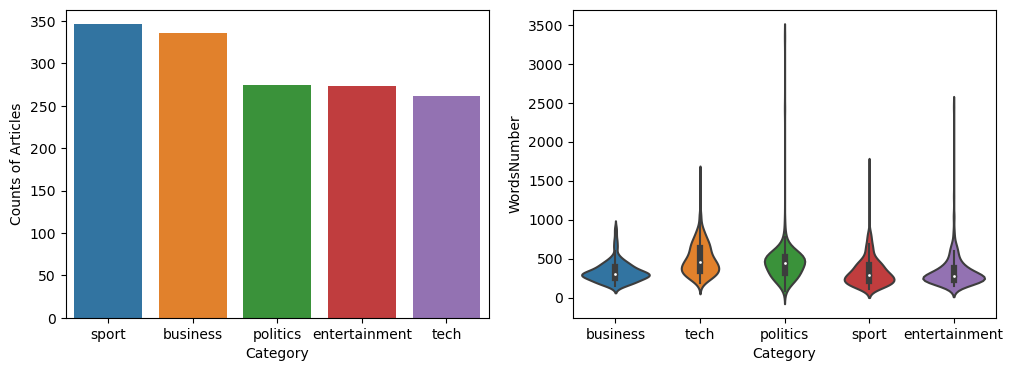

In [7]:
# print the counts of each category
cat_counts = train.Category.value_counts()
print(cat_counts)

# create a column for the number of words in the text
train['WordsNumber'] = train.Text.apply(lambda x: len(x.split()))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
g1 = sns.barplot(x=cat_counts.index, y=cat_counts.values, ax=ax[0])
g1.set_ylabel('Counts of Articles')
g2 = sns.violinplot(data=train, x='Category', y='WordsNumber',ax=ax[1])

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# download the packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Anastasia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Anastasia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Anastasia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
# set the stop words and the lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# function to clean the text
def clean_text(text):
    words = word_tokenize(text.lower())
    return [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]

# create a new column for the cleaned text
train['CleanText'] = train['Text'].apply(clean_text)

# record the word counts for each category
word_counts_per_cat = {}
for cat in train['Category'].unique():
    words = sum(train[train['Category'] == cat]['CleanText'], [])
    word_counts = pd.Series(words).value_counts()
    word_counts_per_cat[cat] = word_counts
    

In [37]:
# show a sample of the cleaned text
train.sample(1).CleanText.values

array([list(['u', 'bank', 'loses', 'customer', 'detail', 'bank', 'america', 'revealed', 'lost', 'computer', 'tape', 'containing', 'account', 'detail', 'one', 'million', 'customer', 'u', 'federal', 'employee', 'several', 'member', 'u', 'senate', 'among', 'affected', 'could', 'vulnerable', 'identity', 'theft', 'senate', 'source', 'say', 'missing', 'tape', 'may', 'stolen', 'plane', 'baggage', 'handler', 'bank', 'gave', 'detail', 'record', 'disappeared', 'said', 'probably', 'misused', 'customer', 'account', 'monitoring', 'account', 'holder', 'would', 'notified', 'unusual', 'activity', 'detected', 'bank', 'official', 'said', 'bank', 'america', 'said', 'tape', 'went', 'missing', 'december', 'shipped', 'data', 'centre', 'federal', 'law', 'authority', 'done', 'robust', 'thorough', 'investigation', 'neither', 'would', 'make', 'statement', 'lightly', 'believe', 'tape', 'lost', 'alexandra', 'tower', 'spokeswoman', 'north', 'bank', 'told', 'time', 'magazine', 'although', 'evidence', 'criminal', 'a

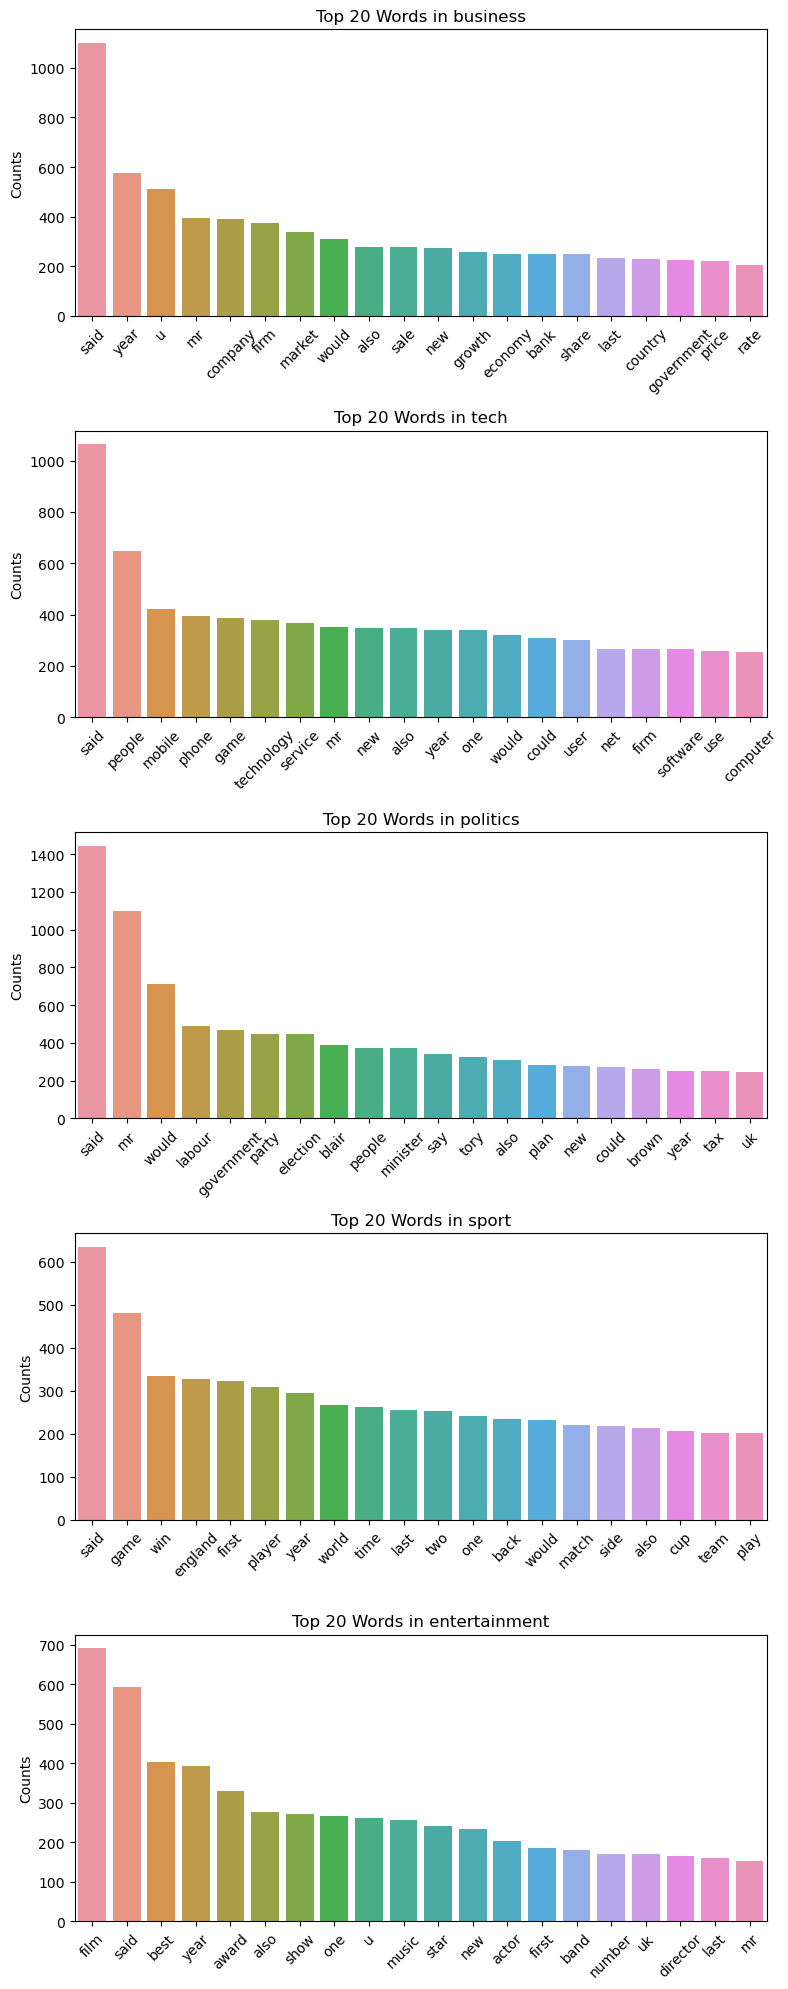

In [11]:
# plot the top 20 words for each category
fig, axes = plt.subplots(len(train['Category'].unique()), 1, figsize=(8, 20))
for i, cat in enumerate(train['Category'].unique()):
    top_words = word_counts_per_cat[cat][:20]
    sns.barplot(x=top_words.index, y=top_words.values, ax=axes[i])
    axes[i].set_title(f'Top 20 Words in {cat}')
    axes[i].set_ylabel('Counts')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


From the plots above, we can observe that the top 20 words for different categories vary and align with their respective themes. For example:
- Business includes words such as company, firm, market, growth, economy, bank, share, country, government, price, rate, etc.
- Tech includes words such as mobile, phone, game, technology, service, user, net, firm, software, use, computer, etc.
- Politics includes words such as labour, government, party, election, people, minister, tory, plan, tax, etc.
- Sport includes words such as game, win, player, time, match, cup, team, play, etc.
- Entertainment includes words such as film, award, show, music, star, actor, band, director, etc.

# Building and Training Models
[35 pts]

In [27]:
print(type(train['CleanText'].iloc[0]))

# transform the list of words into a string
train['CleanTextStr'] = train['CleanText'].apply(lambda x: ' '.join(x))


<class 'list'>


In [28]:
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def label_permutation(true, pred):
    all_scores = []
    labels = true.unique().tolist()
    
    for perm in itertools.permutations(range(len(labels))):
        map_dict = dict(zip(labels, perm))
        maped_true = true.map(map_dict)
        acc = accuracy_score(maped_true, pred)
        all_scores.append([acc, perm])
    
    best_score, best_perm = max(all_scores, key=lambda x: x[0])
    best_map_dict = dict(zip(labels, best_perm))
    maped_true = true.map(best_map_dict)
    cm = confusion_matrix(maped_true, pred)
    
    best_labels = [ label for label, _ in sorted(best_map_dict.items(), key=lambda x: x[1])]
    
    print(f'Best Accuracy: {best_score:.5f}')   
    print(f'Best Permutation: {best_perm}')
    print(f'Corresponding Labels: {labels}')
    #print(f'Confusion Matrix:')
    # ConfusionMatrixDisplay(cm, display_labels=best_labels).plot(values_format='d')
    # plt.show()
    
    
    return best_score, best_labels, cm

In [29]:
def cm_plot(cm, labels=None):
    print('Confusion Matrix:')
    print(cm)
    
    norm_cm = cm / cm.sum(axis=1, keepdims=True)
    plt.figure(figsize=(5, 4))
    sns.heatmap(norm_cm, annot=True, fmt='.3f', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Count Vectorizer vs TF-IDF Vectorizer

### Count Vectorizer

NMF with Count Vectorizer
Best Accuracy: 0.66980
Best Permutation: (3, 0, 1, 2, 4)
Corresponding Labels: ['business', 'tech', 'politics', 'sport', 'entertainment']
Confusion Matrix:
[[204  16  36   0   5]
 [  8 260   3   3   0]
 [  3  22 319   0   2]
 [160 124   2  47   3]
 [ 46  27  30   2 168]]


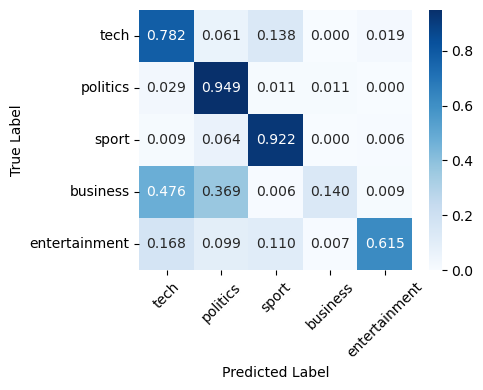

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
# from gensim.models import Word2Vec

from sklearn.decomposition import NMF

SEED = 2004

count_vec = CountVectorizer()
X_train_count = count_vec.fit_transform(train['CleanTextStr'])

nmf= NMF(n_components=5, random_state=SEED)
nmf.fit(X_train_count)

pred = nmf.transform(X_train_count).argmax(axis=1)

print('NMF with Count Vectorizer')
best_score, best_labels, cm = label_permutation(train['Category'], pred)

cm_plot(cm, best_labels)

### TF-IDF Vectorizer

NMF with TF-IDF Vectorizer
Best Accuracy: 0.91477
Best Permutation: (4, 2, 1, 0, 3)
Corresponding Labels: ['business', 'tech', 'politics', 'sport', 'entertainment']
Confusion Matrix:
[[341   0   0   3   2]
 [  3 247   4   0  20]
 [  5   3 244   7   2]
 [  4   8  34 221   6]
 [  0  15  10   1 310]]


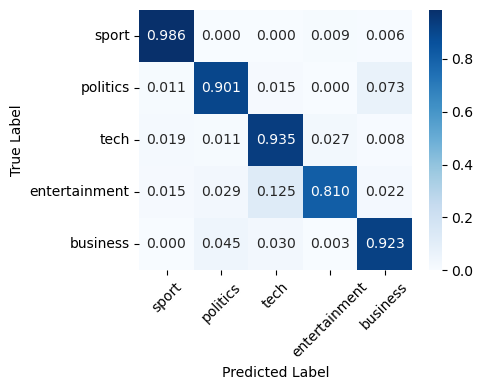

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
X_train_tfidf = tfidf_vec.fit_transform(train['CleanTextStr'])

nmf= NMF(n_components=5, random_state=SEED)
nmf.fit(X_train_tfidf)

pred = nmf.transform(X_train_tfidf).argmax(axis=1)

print('NMF with TF-IDF Vectorizer')
best_score, best_labels, cm = label_permutation(train['Category'], pred)

cm_plot(cm, best_labels)


NMF with Count Vectorizer obtained the best accuracy: 0.66980 and

NMF with TF-IDF Vectorizer obtained the best Accuracy: 0.91477. 

Therefore I will try different combinations of hyperparameters for NMF with TF-IDF.

### Hyperparameters
compare the performance of different combinations of hyperparameters

In [17]:
import warnings
warnings.filterwarnings('ignore')

# set the options
init_option = ['random', 'nndsvd', 'nndsvda', 'nndsvdar']
solver_option = ['cd', 'mu']
beta_loss_option = ['frobenius', 'kullback-leibler', 'itakura-saito']

# loop through the options
all_scores = []
for init in init_option:
    for solver in solver_option:
        for beta_loss in beta_loss_option:
            try:
                print(f'Fitting NMF with init={init}, solver={solver}, beta_loss={beta_loss}')
                nmf = NMF(n_components=5, random_state=SEED, init=init, solver=solver, beta_loss=beta_loss)
                nmf.fit(X_train_tfidf)
                pred = nmf.transform(X_train_tfidf).argmax(axis=1)
                best_score, best_labels, cm = label_permutation(train['Category'], pred)  # 修正這裡
                all_scores.append([best_score, init, solver, beta_loss])
            except ValueError as e:
                print(f"Error with init={init}, solver={solver}, beta_loss={beta_loss}: {e}")
            print('-'*20)
            print('')
            


Fitting NMF with init=random, solver=cd, beta_loss=frobenius
Best Accuracy: 0.90000
Best Permutation: (3, 0, 4, 1, 2)
Corresponding Labels: ['business', 'tech', 'politics', 'sport', 'entertainment']
--------------------

Fitting NMF with init=random, solver=cd, beta_loss=kullback-leibler
Error with init=random, solver=cd, beta_loss=kullback-leibler: Invalid beta_loss parameter: solver 'cd' does not handle beta_loss = 'kullback-leibler'
--------------------

Fitting NMF with init=random, solver=cd, beta_loss=itakura-saito
Error with init=random, solver=cd, beta_loss=itakura-saito: Invalid beta_loss parameter: solver 'cd' does not handle beta_loss = 'itakura-saito'
--------------------

Fitting NMF with init=random, solver=mu, beta_loss=frobenius
Best Accuracy: 0.72148
Best Permutation: (2, 3, 4, 1, 0)
Corresponding Labels: ['business', 'tech', 'politics', 'sport', 'entertainment']
--------------------

Fitting NMF with init=random, solver=mu, beta_loss=kullback-leibler
Best Accuracy: 0.

In [18]:
# summarize and print the results
all_scores = pd.DataFrame(all_scores, columns=['Accuracy', 'Init', 'Solver', 'BetaLoss'])
print(all_scores.sort_values('Accuracy', ascending=False))

    Accuracy      Init Solver          BetaLoss
11  0.940940  nndsvdar     mu  kullback-leibler
8   0.938255   nndsvda     mu  kullback-leibler
5   0.928859    nndsvd     mu  kullback-leibler
3   0.914765    nndsvd     cd         frobenius
6   0.914765   nndsvda     cd         frobenius
9   0.914765  nndsvdar     cd         frobenius
10  0.910738  nndsvdar     mu         frobenius
7   0.908725   nndsvda     mu         frobenius
0   0.900000    random     cd         frobenius
4   0.856376    nndsvd     mu         frobenius
1   0.721477    random     mu         frobenius
2   0.665101    random     mu  kullback-leibler


NMF with init='nndsvdar', solver='mu', beta_loss='kullback-leibler' obtained the best accuracy 0.94094

Best Accuracy: 0.94094
Best Permutation: (4, 2, 1, 0, 3)
Corresponding Labels: ['business', 'tech', 'politics', 'sport', 'entertainment']
Confusion Matrix:
[[342   1   0   2   1]
 [  3 260   1   2   8]
 [  9   2 244   4   2]
 [ 14   1   6 251   1]
 [  1  11  17   2 305]]


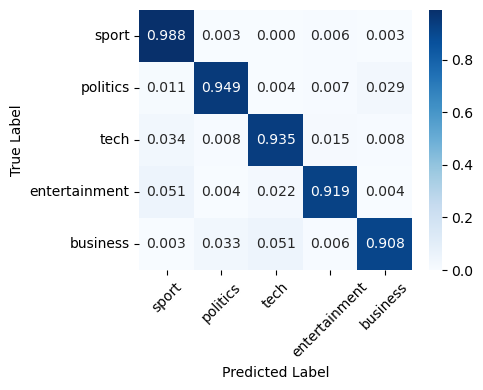

In [19]:
# fit the best model
best_nmf = NMF(n_components=5, random_state=SEED, init='nndsvdar', solver='mu', beta_loss='kullback-leibler')
best_nmf.fit(X_train_tfidf)

# predict and show the results
pred = best_nmf.transform(X_train_tfidf).argmax(axis=1)
best_score, best_labels, cm = label_permutation(train['Category'], pred)
cm_plot(cm, best_labels)


### Test Data

In [20]:
# clean the test data
test['CleanText'] = test['Text'].apply(clean_text)
test['CleanTextStr'] = test['CleanText'].apply(lambda x: ' '.join(x))

# transform the test data to tf-idf vectors
X_test_tfidf = tfidf_vec.transform(test['CleanTextStr'])
# predict the test data
test_pred = best_nmf.transform(X_test_tfidf).argmax(axis=1)
# map the predicted labels to the original labels
test_pred_label = [best_labels[i] for i in test_pred]
# add the predicted labels to the test dataframe
test['Category'] = test_pred_label


In [21]:
test.head()

,ArticleId,Text,CleanText,CleanTextStr,Category
0,1018,qpr keeper day heads for preston queens park r...,"[qpr, keeper, day, head, preston, queen, park,...",qpr keeper day head preston queen park ranger ...,sport
1,1319,software watching while you work software that...,"[software, watching, work, software, monitor, ...",software watching work software monitor every ...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,"[arcy, injury, add, ireland, woe, gordon, arcy...",arcy injury add ireland woe gordon arcy ruled ...,sport
3,459,india s reliance family feud heats up the ongo...,"[india, reliance, family, feud, heat, ongoing,...",india reliance family feud heat ongoing public...,business
4,1020,boro suffer morrison injury blow middlesbrough...,"[boro, suffer, morrison, injury, blow, middles...",boro suffer morrison injury blow middlesbrough...,sport


In [22]:
# save the submission
test[['ArticleId', 'Category']].to_csv('Submission/bbc_submission.csv', index=False)

The unsupervised NMF model obtained the test public score 0.9551

<img src='pics/public_score.png' width=500>

# Compare with supervised learning 
[30 pts]

## Supervised Model
SVM, KNN, LightGBM

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, train['Category'], test_size=0.1, random_state=SEED)


### SVM

Accuracy: 0.98658
Confusion Matrix:
[[29  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  1 25  0  0]
 [ 0  0  0 41  0]
 [ 0  1  0  0 32]]


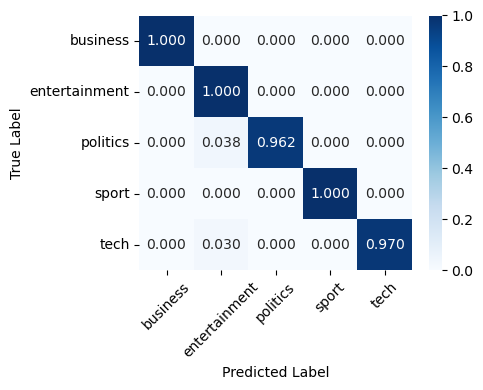

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

svm = SVC(kernel='linear', C=1, random_state=SEED)
svm.fit(X_train, y_train)
pred = svm.predict(X_val)

acc = accuracy_score(y_val, pred)
print(f'Accuracy: {acc:.5f}')

cm = confusion_matrix(y_val, pred)
label = sorted(y_val.unique())

cm_plot(cm, label)

#### Test Data and Prediction

In [42]:
test_pred = svm.predict(X_test_tfidf)
test['Category'] = test_pred

test[['ArticleId', 'Category']].to_csv('Submission/tfidf_svm.csv', index=False)

The supervised SVM model obtained public score 0.98367

<img src='pics/public_score_tfidf_svm.png' width=500>

### KNN

Accuracy: 0.95973
Confusion Matrix:
[[28  0  0  0  1]
 [ 0 20  0  0  0]
 [ 1  1 23  0  1]
 [ 0  0  0 41  0]
 [ 0  2  0  0 31]]


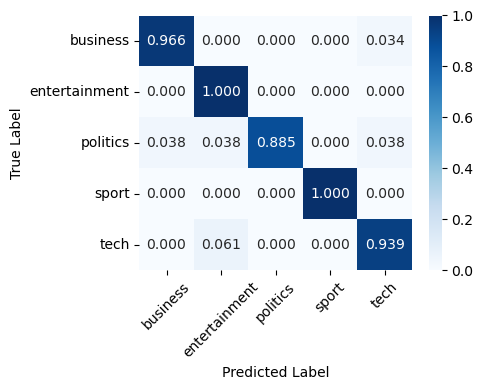

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_val)

acc = accuracy_score(y_val, pred)
print(f'Accuracy: {acc:.5f}')

cm = confusion_matrix(y_val, pred)
label = sorted(y_val.unique())

cm_plot(cm, label)

#### Test Data and Prediction

In [44]:
test_pred = knn.predict(X_test_tfidf)
test['Category'] = test_pred

test[['ArticleId', 'Category']].to_csv('Submission/tfidf_knn.csv', index=False)

KNN obtained the public score 0.94965

<img src='pics/public_score_tfidf_knn.png' width=500>

### LightGBM

Accuracy: 0.93289
Confusion Matrix:
[[26  0  0  0  3]
 [ 1 19  0  0  0]
 [ 0  0 25  0  1]
 [ 0  0  0 41  0]
 [ 3  2  0  0 28]]


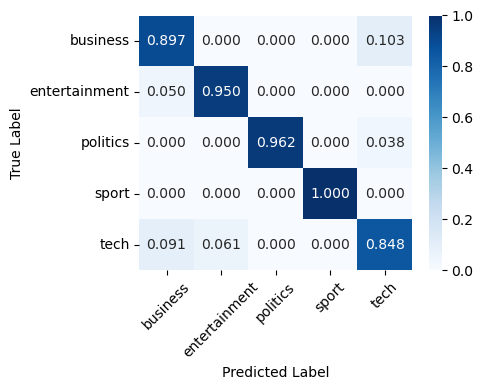

In [46]:
import lightgbm as lgbm

params = {
    'objective': 'multiclass',
    'num_class': 5,
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'random_state': SEED,
    'verbose': -1
}   

lgbm_model = lgbm.LGBMClassifier(**params)
lgbm_model.fit(X_train, y_train)
pred = lgbm_model.predict(X_val)

acc = accuracy_score(y_val, pred)
print(f'Accuracy: {acc:.5f}')

cm = confusion_matrix(y_val, pred)
label = sorted(y_val.unique())

cm_plot(cm, label)

#### Test Data and Predition

In [47]:
test_pred = lgbm_model.predict(X_test_tfidf)
test['Category'] = test_pred

test[['ArticleId', 'Category']].to_csv('Submission/tfidf_lgbm.csv', index=False)

LightGBM obtained the public score 0.96326

<img src='pics/public_score_tfidf_lgbm.png' width=500>

### Comparison

Accuracy

| Model | Train Data | Test Data |
| --- | --- | --- |
| NMF | 0.94094 | 0.9551 |

<br>

| Model | Validation Data | Test Data |
| --- | --- | --- |
| SVM | 0.98658 | 0.98367 |
| KNN | 0.95973 | 0.94965 |
| LightGBM | 0.93289 | 0.96326 |

<br>

- NMF obtains an accuracy of 0.9551, indicating it is an effective method for this task.

- KNN's performance on this task is nearly similar to that of NMF, with an accuracy of 0.94965.

- LightGBM did not perform well on the validation data but demonstrated good generalization capability on the test data, with an accuracy of 0.96326.

- SVM obtained the best result and achieved a public score of 0.98367.

### Train Data Sizes

In [49]:
from sklearn.model_selection import train_test_split

X_50, _, y_50, _ = train_test_split(X_train_tfidf, 
                                    train['Category'], 
                                    test_size=0.5, 
                                    stratify=train['Category'], 
                                    random_state=SEED)
print(X_50.shape, y_50.shape)

X_10, _, y_10, _ = train_test_split(X_train_tfidf,
                                    train['Category'],
                                    test_size=0.9,
                                    stratify=train['Category'],
                                    random_state=SEED)
print(X_10.shape, y_10.shape)

(745, 20456) (745,)
(149, 20456) (149,)


#### NMF with Train Data 50%, 10%

In [30]:
best_nmf_50 = NMF(n_components=5, random_state=SEED, init='nndsvdar', solver='mu', beta_loss='kullback-leibler')
best_nmf_50.fit(X_50)
pred_nmf_50 = best_nmf_50.transform(X_50).argmax(axis=1)
print('NMF with 50% of the data')
best_score_50, best_labels_50, cm_50 = label_permutation(y_50, pred_nmf_50)
print('')

best_nmf_10 = NMF(n_components=5, random_state=SEED, init='nndsvdar', solver='mu', beta_loss='kullback-leibler')
best_nmf_10.fit(X_10)
pred_nmf_10 = best_nmf_10.transform(X_10).argmax(axis=1)
print('NMF with 10% of the data')
best_score_10, best_labels_10, cm_10 = label_permutation(y_10, pred_nmf_10)



NMF with 50% of the data
Best Accuracy: 0.94228
Best Permutation: (2, 0, 3, 1, 4)
Corresponding Labels: ['tech', 'sport', 'entertainment', 'politics', 'business']

NMF with 10% of the data
Best Accuracy: 0.89262
Best Permutation: (2, 1, 3, 0, 4)
Corresponding Labels: ['sport', 'politics', 'business', 'tech', 'entertainment']


#### NMF with Test Data and Prediction

In [31]:
test_pred = best_nmf_50.transform(X_test_tfidf).argmax(axis=1)
test_pred_label = [best_labels_50[i] for i in test_pred]
test['Category'] = test_pred_label

test[['ArticleId', 'Category']].to_csv('Submission/bbc_submission_nmf_50.csv', index=False)

NMF trained with 50% Train Data obtained public score 0.9551

<img src='pics/public_score_50.png' width=500>

In [32]:
test_pred = best_nmf_10.transform(X_test_tfidf).argmax(axis=1)
test_pred_label = [best_labels_10[i] for i in test_pred]
test['Category'] = test_pred_label

test[['ArticleId', 'Category']].to_csv('Submission/bbc_submission_nmf_10.csv', index=False)

NMF trained with 10% Train Data obtained public score 0.92517

<img src='pics/public_score_10.png' width=500>

### SVM with Train Data 50%, 10%

In [50]:
svm = SVC(kernel='linear', C=1, random_state=SEED)
svm.fit(X_50, y_50)

test_pred = svm.predict(X_test_tfidf)
test['Category'] = test_pred
test[['ArticleId', 'Category']].to_csv('Submission/bbc_submission_svm_50.csv', index=False)

SVM trained with 50% train data obtained the public score of 0.97414

<img src='pics/public_score_svm_50.png' width=500>

In [51]:
svm = SVC(kernel='linear', C=1, random_state=SEED)
svm.fit(X_10, y_10)

test_pred = svm.predict(X_test_tfidf)
test['Category'] = test_pred
test[['ArticleId', 'Category']].to_csv('Submission/bbc_submission_svm_10.csv', index=False)

SVM trained with 10% train data obtained the public score of 0.92789

<img src='pics/public_score_svm_10.png' width=500>

### LightGBM with Train Data 50%, 10%

In [52]:
lgbm_model = lgbm.LGBMClassifier(**params)
lgbm_model.fit(X_50, y_50)

test['Category'] = lgbm_model.predict(X_test_tfidf)
test[['ArticleId', 'Category']].to_csv('Submission/bbc_submission_lgbm_50.csv', index=False)


LGBM trained with 50% Train Data obtained the public score 0.95102

<img src='pics/public_score_lgbm_50.png' width=500>

In [53]:
lgbm_model = lgbm.LGBMClassifier(**params)
lgbm_model.fit(X_10, y_10)

test['Category'] = lgbm_model.predict(X_test_tfidf)
test[['ArticleId', 'Category']].to_csv('Submission/bbc_submission_lgbm_10.csv', index=False)

LGBM trained with 10% Train Data obtained the public score 0.71292

<img src='pics/public_score_lgbm_10.png' width=500>

### Comparison

Test Set Accuracy

| Model | Acc with Train Data | Acc with 50% Train Data | Acc with 10% Train Data|
| --- | --- | ---| --- |
| NMF |  0.9551 | 0.9551 | 0.92517 |
| SVM |  0.98367 | 0.97414 | 0.92789 |
| LightGBM | 0.96326 | 0.95102 | 0.71292|

<br>

- The NMF model is not sensitive to changes in the amount of training data. Even when the training data is reduced to 50%, its accuracy remains the same at 0.9551. However, when the training data is reduced to 10%, the accuracy drops to 0.92517, but the reduction is not significant. Its strong generalization capabilities, with performance remaining more stable under conditions of reduced training data, make it a good choice in data-constrained situations.

- For the SVM model, when the training data is reduced to 50%, the accuracy slightly decreases from 0.98367 to 0.97414, indicating that SVM is relatively stable in response to changes in the amount of training data. A further reduction to 10% of the training data brings the accuracy down to 0.92789, showing that SVM is more sensitive to significant reductions in training data but still maintains good generalization ability.

- With the LightGBM model, when the training data is reduced to 50%, the accuracy drops from 0.96326 to 0.95102, showing a certain sensitivity to the reduction in training data. However, when the training data is reduced to 10%, the accuracy drops significantly to 0.71292, indicating that LightGBM's generalization ability significantly decreases with a very low amount of training data.
